# Time Series Forescasting

In [4]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

#learnt:
#1. convert month string to date variable
#2. stationarity and seasoanlity
#3. to get stationaroty: use differencing with periods 1
#4. to check for stationarity using ACF PACF graphs, decaying
#5. after differencing, check again using plot for stationarity
#6 Build AR Model, split data
    #in ar model, the pdq values are auto selcted
#7 you can build MA model too
#8 Build arima model
    #to check for best Pdq values, use for loop to see the best combination and use forecast function to forecast values
    

<ipython-input-4-5b489f4d910b>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [15]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

sales = pd.read_csv("/Users/riteshtripathi/Desktop/cars.csv",index_col=0, parse_dates=[0] ,date_parser=parser)

In [14]:
sales.Month[1]
#this confirms my date is now date variable
#this will throw error, as i have put month as my first index, remove the above code as index_col = 0 and run sales.Month[1]

AttributeError: 'DataFrame' object has no attribute 'Month'

In [16]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [12]:
sales.Month[1]

Timestamp('2016-02-01 00:00:00')

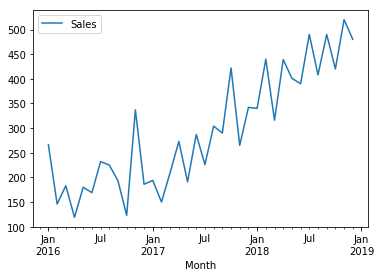

In [17]:
sales.plot()
#below graph isnt stationarity
#the mean somewhere below is 100 and the mean var above are 450
#this is because my data has trend
#there is increase of sales over period of time
#therefore abvoe, we have to convert to stationary
#otherwise we cant apply any of time series analysis

Stationary means mean, variance and covariance is constant over periods.

In [18]:
sales.diff(periods = 1)

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0
2016-08-01,-7.0
2016-09-01,-32.0


In [20]:
sales_diff = sales.diff(periods = 1)

#this is also called integrated of order 1, we are taking 1 time lag or period difference
#denoted by d for difference 
#one of the parameter of ARIMA model

In [21]:
sales_diff.head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [23]:
#i dont like the nan word
sales_diff = sales_diff[1:] 
#take first value to end
sales_diff.head()

,Sales
Month,
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0


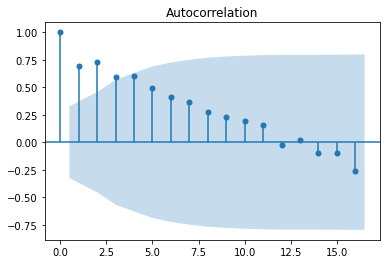

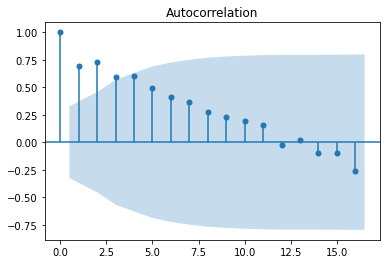

In [25]:
#Converting series to stationary
    #we will take difference of series
    #in differencing the first row will become nan, check above
    
#we can also use ACF to see if its stationarity

#this is showing correlation between two series 
#since this has only one series, there is correlation between same series with time lag
#we see the acf is slowly decaying, this showing that series is not stationariyt
#ideally its should be, from first correlation which is 1, it should immediately decrease in big time
    #the next correlation should either be 0 or negative
    #that shows your data is stationary
    #and we need stationary data to do time series forecasting
    
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

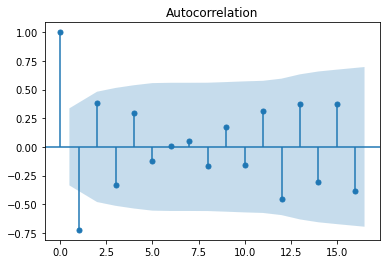

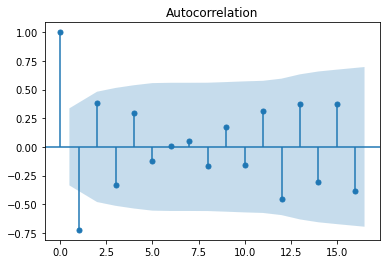

In [26]:
plot_acf(sales_diff)
#now we see very good stationary

#lets look at visually


<AxesSubplot:xlabel='Month'>

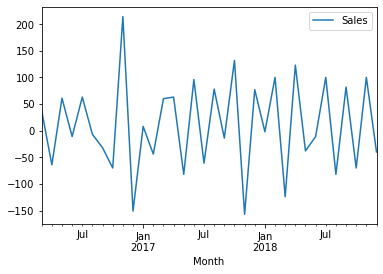

In [27]:
sales_diff.plot()
#now we see there is no trend here, its stationary
#mean, var looks almost the same

#this data is good enough for time series analysisx

# Autoreggresive AR Model

In [29]:
#Next Step 2
#Splitting Data
X = sales.values
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []   #to predict using arima model

In [30]:
train.size

27

In [31]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar = AR(train)
model_ar_fit = model_ar.fit()

/Users/riteshtripathi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WAR

In [32]:
predictions = model_ar_fit.predict(start=26,end=36)

In [51]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]])

<AxesSubplot:xlabel='Month'>

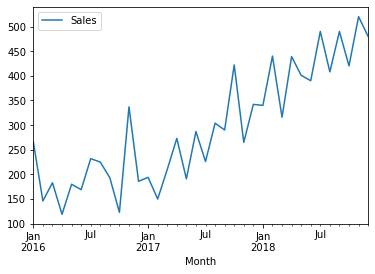

In [34]:
#Actual Graph was
sales.plot()

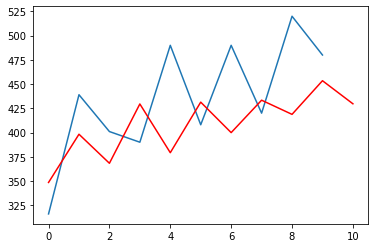

In [33]:
#now the graph is
plt.plot(test)
plt.plot(predictions,color='red')
#we have not done anything in stationarity thats why its not showing the right graph

#so this is our Autoregressive AR model
#we can also do MA model, 

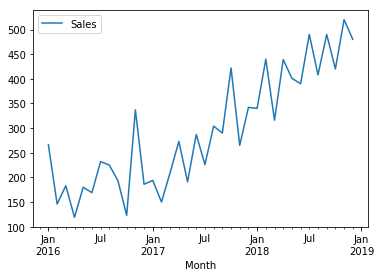

In [49]:
sales.plot()

# ARIMA model

In [35]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
#p,d,q  p = periods taken for autoregressive model
    #if i want to predict June sales, i will take one period for May to predict
    #if i am taking april and may, then i am taking two periods
    
#d -> Integrated order, difference, typically one or two is good
# q periods in moving average model

#in AR, paramters are found by itself, but in arima u need to specify
#if incase you get any error in this block, go back to your train and test and change their values 

model_arima = ARIMA(train,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

#we keep changing the pdq values to get the best value for aic
#but best way is to use the for loop as shown below
#as per for loop,the best combination i have got is 4,1,1
#but i have used 9,1,0 as the graph looks better

/Users/riteshtripathi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


297.16198419809785


In [39]:
#in AR, we use predict function
#in arima we use forecast model
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([396.0451228 , 355.94736549, 413.095568  , 374.50910123,
       446.94669323, 378.62487311, 406.37551675, 411.38904987,
       475.90201789, 415.39179152])

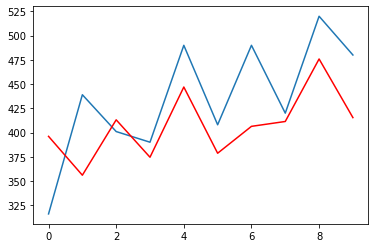

In [40]:
plt.plot(test)
plt.plot(predictions,color='red')

In [82]:
#how to get best value for pdq, use for loop
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [86]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    
#this gives the best aic value


(0, 0, 0) 319.452858523
(0, 0, 1) 318.72448093855843
(0, 0, 2) 315.25060028819166
(0, 0, 3) nan
(0, 0, 4) 310.1669328586838
(0, 1, 0) 311.829398349
(0, 1, 1) 296.0841523580429
(0, 1, 2) 296.3229226907717
(0, 2, 0) 329.183495825
(0, 2, 1) 306.1019479844314
(1, 0, 0) 316.1668717523843
(1, 0, 1) 313.04871744128553
(1, 0, 2) 310.9790642227309
(1, 0, 4) 309.6779931143489
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.125651125858
(1, 1, 2) 299.47166670629974
(1, 1, 3) 301.28511809508103
(1, 1, 4) 299.9787323970439
(1, 2, 0) 306.53077675712257
(1, 2, 3) 290.3253394337328
(2, 0, 0) 310.996957361246
(2, 0, 4) nan
(2, 1, 0) 300.2089561240259
(2, 1, 1) 297.9999930167356
(2, 1, 2) 298.550542813022
(2, 1, 3) 302.8720832242939
(2, 2, 0) 306.2975856432374
(2, 2, 3) nan
(3, 0, 0) 312.9838587419075
(3, 0, 4) nan
(3, 1, 0) 294.8543584218629
(3, 1, 1) 295.9979353418878
(3, 1, 2) 292.6686238694057
(3, 1, 3) 294.65889075168667
(3, 2, 0) 299.40758681562386
(3, 2, 4) nan
(4, 0, 0) 311.0706562026968
(4, 0, 1) 321

In [41]:
#final step
mean_squared_error(test,predictions)
#the minimum error has to be the minimum

2959.3773086776796